In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import json
from mpl_toolkits.basemap import Basemap

In [2]:
# borders
east = -73.700009999999992;
west = -74.255589999999998;
south = 40.496119999999998;
north = 40.915529999999997;

In [3]:
#Empire State Building
ESB = [40.7488006,-73.9857012];

In [4]:
# load data
df = pd.read_pickle('data//May2016-aggregate.pcl');
totalTrips = df.groupby(level='Region').sum();
totalTrips.reset_index(inplace = True);

meanTrips = df.groupby(level='Region').mean();
meanTrips.reset_index(inplace = True);
# filter cells
meanTrips = meanTrips.assign(crowd = meanTrips['count']>5);

In [5]:
print 'Количество пар ячейка-час с нулевым количествов поездок', totalTrips[totalTrips['count']==0].shape[0]

Количество пар ячейка-час с нулевым количествов поездок 1283


In [13]:
plt.figure(figsize=(12, 12))

map1 = Basemap(projection='gnom', resolution='h', lat_0=ESB[0], lon_0=ESB[1], width=1E5, height=1E5)

map1.drawmapboundary(fill_color='aqua')
map1.fillcontinents(color='coral',lake_color='aqua')
map1.drawcoastlines()
map1.drawstates(color='gray')

x, y = map1(ESB[1],ESB[0])
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Empire State Building', fontsize=12);

# Распределение общего количества поездок на карте

In [14]:
regs = pd.read_csv("data//regions.csv",sep=";",index_col='region');
regs['centerX'] = 0.5*(regs.west+regs.east);
regs['centerY'] = 0.5*(regs.south+regs.north);

/home/frodos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


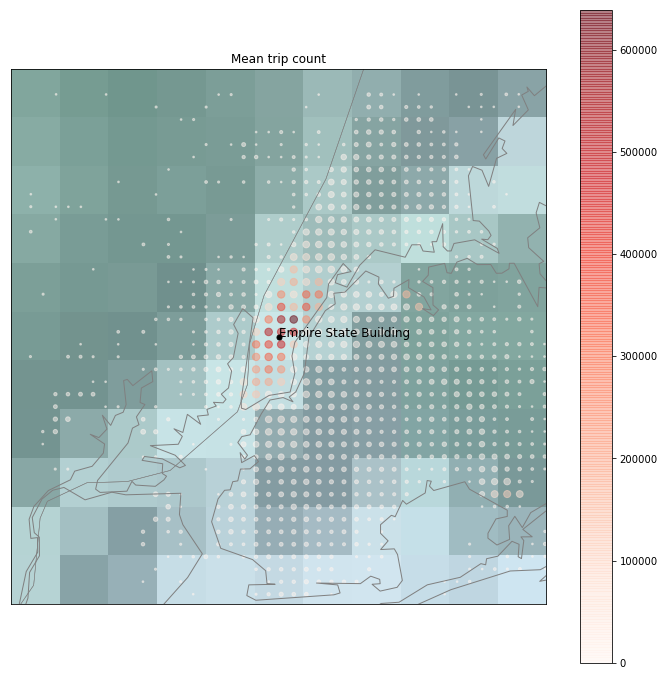

In [17]:
plt.figure(figsize=(12, 12))

map2 = Basemap(projection='gnom', resolution='h', lat_0=ESB[0], lon_0=ESB[1], width=4E4, height=4E4)

map2.shadedrelief()
map2.drawcoastlines(color='gray')
map2.drawcountries(color='gray')
map2.drawstates(color='gray')


x, y = map2(ESB[1],ESB[0])
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Empire State Building', fontsize=12);
map2.scatter(regs['centerX'].values,regs['centerY'].values,latlon=True,s=10*np.log10(totalTrips['count'].values),
             cmap='Reds', alpha=0.5,c=totalTrips['count'].values);
plt.colorbar()
plt.clim(0,totalTrips ['count'].values.max())
plt.title('Mean trip count')

# Распределение среднего количества поездок на карте

In [18]:
#Statue of Liberty
SL = [40.6891949661955, -74.04460590674591];

map2 = folium.Map(location= SL, tiles='Stamen Terrain',min_lat=south, max_lat=north, min_lon=west, max_lon=east)
folium.Marker(SL, popup='Statue of Liberty').add_to(map2);

map2.choropleth(geo_path='data//regs.json', data=meanTrips, columns=['Region','count'], key_on='feature.id',
                fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.1,
                threshold_scale=[0, 200, 400, 600, 800, 1000])
map2

# Ячейки со средним количеством поездок больше 5

In [19]:
map3 = folium.Map(location= ESB, zoom_start=11, tiles='Stamen Terrain',min_lat=south,
                  max_lat=north, min_lon=west, max_lon=east)
map3.choropleth(geo_path='data//regs.json', data=meanTrips, columns=['Region','crowd'], key_on='feature.id',
                fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.1)
map3

/home/frodos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 'threshold_scale' default behavior has changed. Now you get a linear scale between the 'min' and the 'max' of your data. To get former behavior, use folium.utilities.split_six.


In [20]:
print 'Количество ячеек со средниv количеством поездок больше 5 в час равно', meanTrips[meanTrips.crowd].shape[0]

Количество ячеек со средниv количеством поездок больше 5 в час равно 102


Ячейки со средним количеством поездок больше 5 в час отмечены красным цветом на карте. Все они находятся на суше и поездки из них возможны.